# Scott Breitbach
## 03-May-2021
## DSC550, Week 8

# 8.2 Exercise: Titanic Case Study Part 3
[Click here to skip to Week 8](#week_8)
## Case Study: Analyze data to predict who will Survive the Titanic

##### Load libraries

In [1]:
import pandas as pd
import yellowbrick

## Step 1: Load data into a dataframe
Load the data from the “train.csv” file into a DataFrame.

In [2]:
addr1 = 'week-7/train.csv'
df = pd.read_csv(addr1)

## Step 2: Check the dimensions of the table
Display the dimensions of the file (so you’ll have a good idea the amount of data you are working with).

In [3]:
print(f"The table is {df.shape[0]} rows x {df.shape[1]} columns.")

The table is 891 rows x 12 columns.


## Step 3: Look at the data
Display the first 5 rows of data so you can see the column headings and the type of data for each column.

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* **Survival** is represented as a *1* or *0*
* Missing data is represented as **NaN**.
* The **Survived** variable will be the *target* and the other variables will be the *features*.

## Step 4: Think about the data

### What might help predict survival?
* What do the variables look like? For example, are they numerical or categorical data. If they are numerical, what are their distribution; if they are categorical, how many are there in different categories?
* Are the numerical variables correlated?
* Are the distributions of numerical variables the same or different among survived and not survived? Is the survival rate different for different values? For example, were people more likely to survive if they were younger?
* Are there different survival rates in different categories? For example, did more women survive than men?

## Step 5: What type of variables are in the table?
Look at summary information about your data (total, mean, min, max, freq, unique, etc.).  Does this present any more questions for you?  Does it lead you to a conclusion yet? 

In [5]:
print("Describe Data:")
df.describe()

Describe Data:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print("Summarized Data:")
df.describe(include=['O'])

Summarized Data:


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Chibnall, Mrs. (Edith Martha Bowerman)",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


## Step 6: Import visualization packages
Make some histograms of your data (“A picture is worth a thousand words!”)

In [7]:
# Load Libraries
import matplotlib.pyplot as plt

In [8]:
# Set up figure size
plt.rcParams['figure.figsize'] = (20, 10)

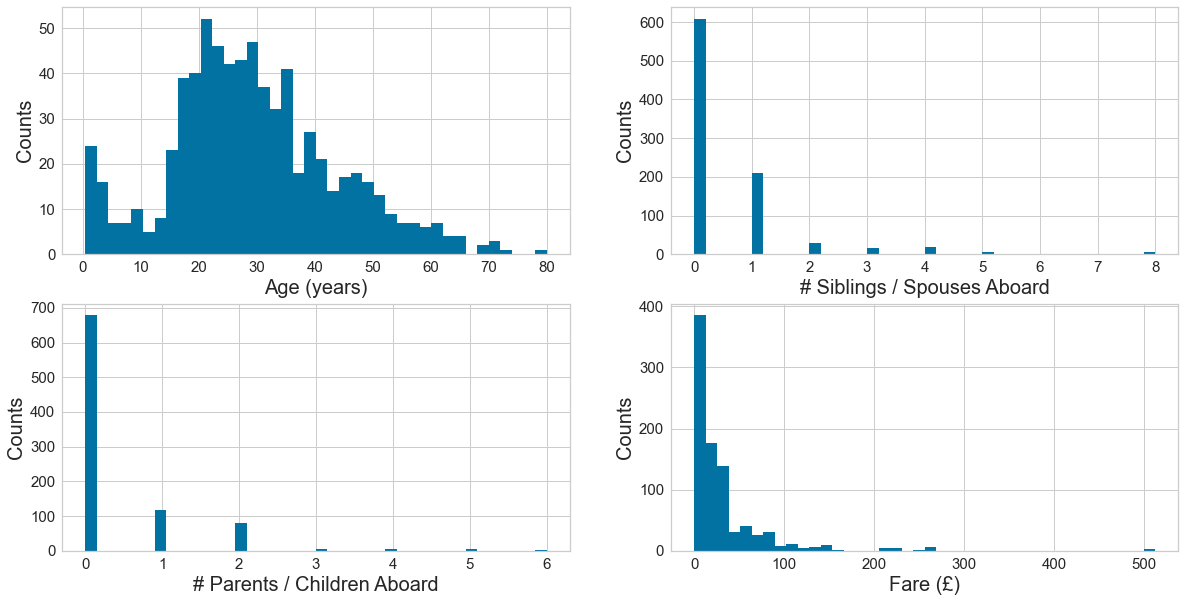

In [9]:
# Make subplots
fig, axes = plt.subplots(nrows=2, ncols=2)

# Specify the features of interest
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
xAxes = ['Age (years)', '# Siblings / Spouses Aboard', 
         '# Parents / Children Aboard', 'Fare (£)']
yAxes = ['Counts'] * 4

# Draw histrograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xAxes[idx], fontsize=20)
    ax.set_ylabel(yAxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
    
plt.show()

* Most of the passengers are around 20 to 30 years old and don't have siblings or relatives with them. 
* A large amount of the tickets sold were less than \$50. 
* There are very few tickets sold where the fare was over \$500.

## Step 7: Barcharts
Make some bar charts for variables with only a few options.
* **Ticket** and **Cabin** have more than 100 variables so don’t do those!

In [10]:
# Set up figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

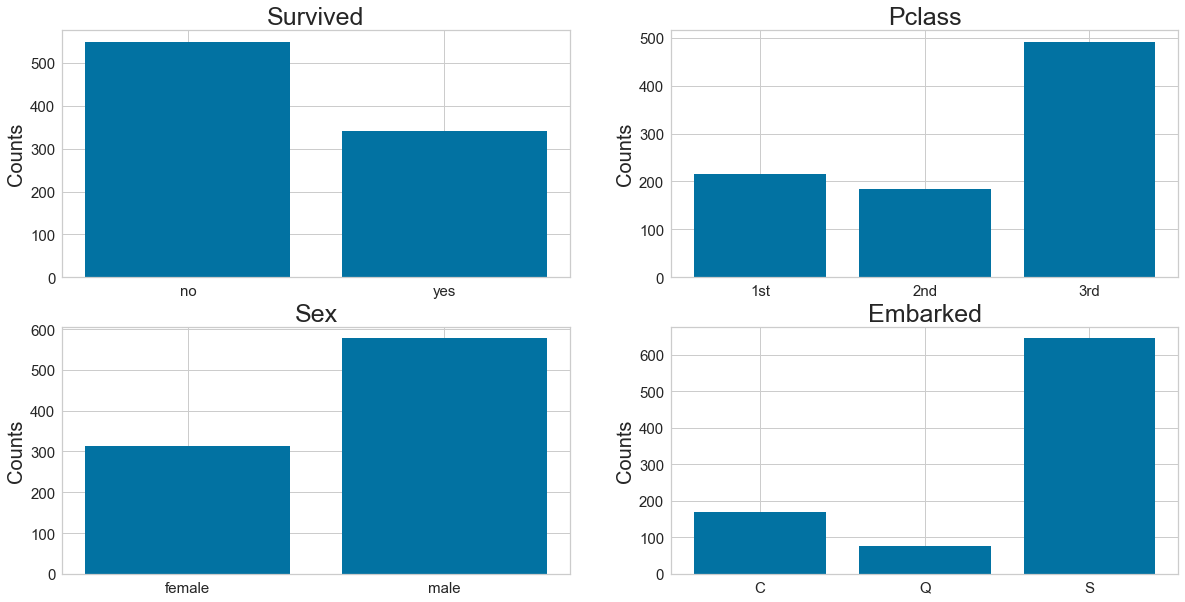

In [11]:
# Make subplots
fig, axes = plt.subplots(nrows=2, ncols=2)


## PLOT 1
# Get the data ready to feed into the visualizer
X_Survived = df.replace({'Survived': 
                         {1: 'yes', 0: 'no'}
                        }).groupby('Survived').size().reset_index(name='Counts')['Survived']
Y_Survived = df.replace({'Survived': 
                         {1: 'yes', 0: 'no'}
                        }).groupby('Survived').size().reset_index(name='Counts')['Counts']

# Make the 1st bar plot
axes[0, 0].bar(X_Survived, Y_Survived)
axes[0, 0].set_title('Survived', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)


## PLOT 2
# Get the data ready to feed into the visualizer
X_Pclass = df.replace({'Pclass': 
                       {1: '1st', 2: '2nd', 3: '3rd'}
                      }).groupby('Pclass').size().reset_index(name='Counts')['Pclass']
Y_Pclass = df.replace({'Pclass': 
                       {1: '1st', 2: '2nd', 3: '3rd'}
                      }).groupby('Pclass').size().reset_index(name='Counts')['Counts']

# Make the 2nd bar plot
axes[0, 1].bar(X_Pclass, Y_Pclass)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)


## PLOT 3
# Get the data ready to feed into the visualizer
X_Sex = df.groupby('Sex').size().reset_index(name='Counts')['Sex']
Y_Sex = df.groupby('Sex').size().reset_index(name='Counts')['Counts']

# Make the 3rd bar plot
axes[1, 0].bar(X_Sex, Y_Sex)
axes[1, 0].set_title('Sex', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)


## PLOT 4
# Get the data ready to feed into the visualizer
X_Embarked = df.groupby('Embarked').size().reset_index(name='Counts')['Embarked']
Y_Embarked = df.groupby('Embarked').size().reset_index(name='Counts')['Counts']

# Make the 4th bar plot
axes[1, 1].bar(X_Embarked, Y_Embarked)
axes[1, 1].set_title('Embarked', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)

plt.show()

## Step 8: Pearson Ranking
To see if the data is correlated, make some Pearson Ranking charts

In [12]:
# Load libraries
from yellowbrick.features import Rank2D  # Package for visualization of the correlation

In [13]:
# Set up figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

In [14]:
# Extract the numpy arrays from the DataFrame
# X = df[num_features].as_matrix()
# X = df[num_features].values()
X = df[num_features].values

<AxesSubplot:title={'center':'Pearson Ranking of 4 Features'}>

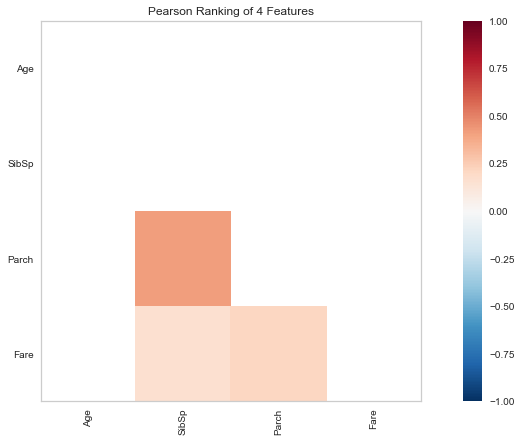

In [15]:
# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)  # Fit the data to the visualizer
visualizer.transform(X)  # Transform the data
# visualizer.poof()  # Draw/show/poof the data
visualizer.poof(outpath='pcoords1.png') # Draw/show/poof the data
# plt.show()

The correlation between the variables is low (1 or -1 is high positive or high negative, 0 is low or no correlation)   
These results show there is “some” positive correlation but it’s not a high correlation.

## Step 9: Compare variables against survival
Use Parallel Coordinates visualization to compare the distributions of numerical variables between passengers that survived and those that did not survive.

In [16]:
# Load libraries
from yellowbrick.features import ParallelCoordinates

In [17]:
# Set up figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

In [18]:
# Set up the color for yellowbrick visualizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

In [19]:
# Specify features of interest and classes of the target
classes = ['Not-Survived', 'Survived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

In [20]:
# Copy data to a new DataFrame
dfNorm = df.copy()

In [21]:
# Normalize data to a 0-1 range
for feature in num_features:
    dfNorm[feature] = (df[feature] - df[feature].mean(skipna=True)) / (df[feature].max(skipna=True) - df[feature].min(skipna=True))

In [22]:
# Extract the numpy arrays from the DataFrame
X = dfNorm[num_features].values
y = df['Survived'].values

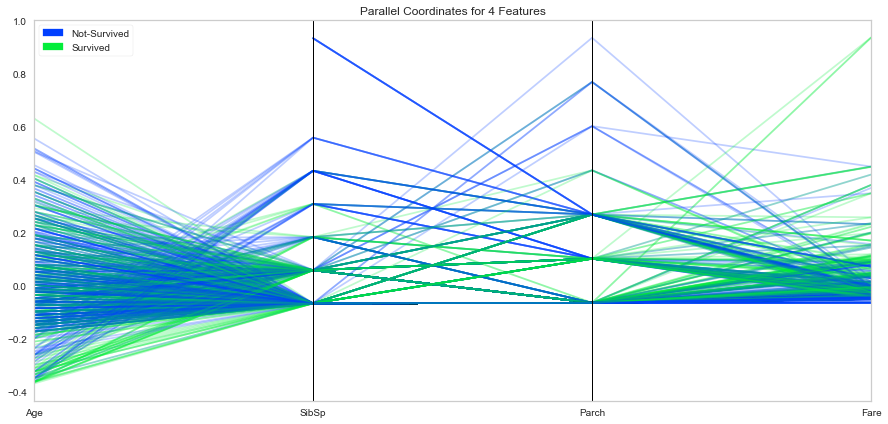

In [23]:
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)

visualizer.fit(X, y)  # Fit the data to the visualizer
visualizer.transform(X)  # Transform the data
visualizer.poof(outpath='pcoords2.png')  # Draw/show/poof the data

plt.show()

Passengers traveling with siblings on the boat have a higher death rate and passengers who paid a higher fare had a higher survival rate.  

## Step 10: Stacked bar charts to to compare survival
Use Stack Bar Charts to compare passengers who survived to passengers who didn’t survive based on the other variables.

In [24]:
# Set up figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

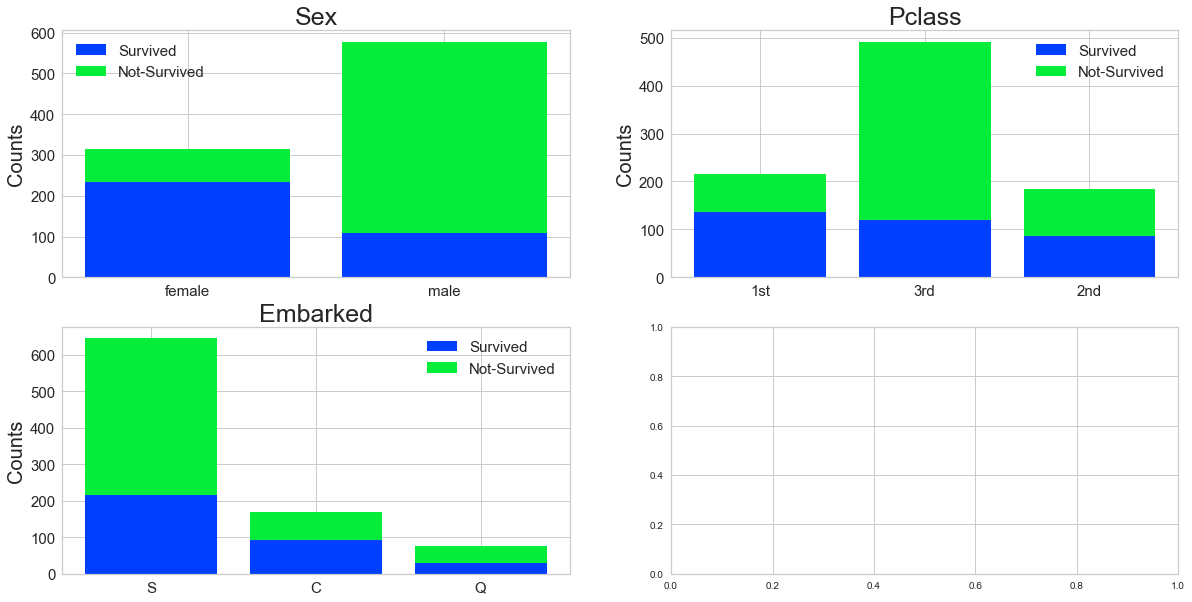

In [25]:
# Make subplots
fig, axes = plt.subplots(nrows=2, ncols=2)


## PLOT 1
# Get the data ready to feed into the visualizer
Sex_survived = df.replace({'Survived': 
                           {1: 'Survived', 0: 'Not-Survived'}
                          })[df['Survived']==1]['Sex'].value_counts()
Sex_not_survived = df.replace({'Survived': 
                               {1: 'Survived', 0: 'Not-Survived'}
                              })[df['Survived']==0]['Sex'].value_counts()
Sex_not_survived = Sex_not_survived.reindex(index=Sex_survived.index)

# Make the 1st bar plot
p1 = axes[0, 0].bar(Sex_survived.index, Sex_survived.values)
p2 = axes[0, 0].bar(Sex_not_survived.index, Sex_not_survived.values, bottom=Sex_survived.values)

axes[0, 0].set_title('Sex', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Survived', 'Not-Survived'), fontsize=15)


## PLOT 2
# Get the data ready to feed into the visualizer
Pclass_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-Survived'}
                             }).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}
                                        })[df['Survived']==1]['Pclass'].value_counts()
Pclass_not_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-Survived'}
                                 }).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}
                                            })[df['Survived']==0]['Pclass'].value_counts()
Pclass_not_survived = Pclass_not_survived.reindex(index=Pclass_survived.index)

# Make the 2nd bar plot
p3 = axes[0, 1].bar(Pclass_survived.index, Pclass_survived.values)
p4 = axes[0, 1].bar(Pclass_not_survived.index, Pclass_not_survived.values, bottom=Pclass_survived.values)

axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Survived', 'Not-Survived'), fontsize=15)


## PLOT 3
# Get the data ready to feed into the visualizer
Embarked_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-Survived'}}
                              )[df['Survived']==1]['Embarked'].value_counts()
Embarked_not_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-Survived'}}
                                  )[df['Survived']==0]['Embarked'].value_counts()
Embarked_not_survived = Embarked_not_survived.reindex(index=Embarked_survived.index)

# Make the 3rd bar plot
p5 = axes[1, 0].bar(Embarked_survived.index, Embarked_survived.values)
p6 = axes[1, 0].bar(Embarked_not_survived.index, Embarked_not_survived.values, bottom=Embarked_survived.values)

axes[1, 0].set_title('Embarked', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Survived', 'Not-Survived'), fontsize=15)

plt.show()

* More females survived than men.  
* 3rd Class tickets had a lower survival rate.  
* Also, embarkation from Southampton port had a lower survival rate.

## Step 11: Fill in missing values and eliminate features
Some of my questions have been answered by seeing the charts but in some ways, looking at this much data has created even more questions.  

In [26]:
# Check for columns containing Null values
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

#### a) Now it’s time to reduce some of the features so we can concentrate on the things that matter!  There features we will get rid of are:  "PassengerId", "Name", "Ticket" and "Cabin".  (ID doesn’t really give us any useful data, Ticket and Cabin have too many variables.  Name might reflect that they are related but we’re keeping the category about siblings (for now).  


In [27]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [28]:
cols_to_keep = ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [29]:
df = df[cols_to_keep]

#### b) We can also fill in missing values.  (Cabin has some missing values but we are dropping that feature.)  Age has some missing values so I’ll fill in with the average age.  Embarked also has some missing so I’ll the most common.  


##### Take care of missing values in **Age** column:

In [30]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [31]:
# Count NA values
df.Age.isna().sum()

177

In [32]:
# Fill missing data with the median value
def fill_na_median(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)

In [33]:
fill_na_median(df['Age'])

In [34]:
# Check the result
df['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [35]:
# Count NA values
df.Age.isna().sum()

0

##### Take care of missing values in **Embarked** column:

In [36]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [37]:
# Count NA values
df.Embarked.isna().sum()

2

In [38]:
# Fill missing data with the most represented value
def fill_na_most(data, inplace=True):
    return data.fillna('S', inplace=inplace)

fill_na_most(df['Embarked'])

In [39]:
# Check the result
df['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [40]:
# Count NA values
df.Embarked.isna().sum()

0

##### Check the data:

In [41]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Step 12: Adjust skewed data (fare)
If you go back and look at the histograms of Fare, you’ll see that it is very skewed…many low cost fares, not very many high cost fares.  Log Transformation is a good method to use on highly skewed data.  


##### Check the distribution with a histogram:

In [42]:
# Set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

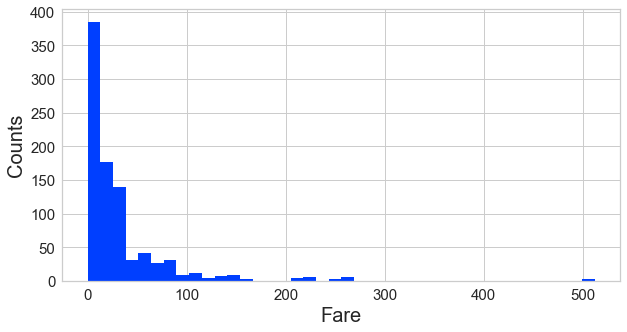

In [43]:
# Create a histogram
plt.hist(df['Fare'], bins=40)
plt.xlabel('Fare', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()

##### Create a new column from the log transformation of the **Fare** column:

In [44]:
# Load libraries
import numpy as np

In [45]:
# Perform a natural log-transformation
def log_transformation(data):
    return data.apply(np.log1p)

df['Fare_log1p'] = log_transformation(df['Fare'])

##### Check the distribution of the transformed column:

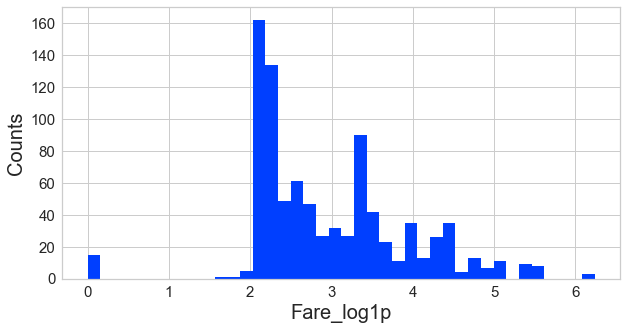

In [46]:
# Create a histogram
plt.hist(df['Fare_log1p'], bins=40)
plt.xlabel('Fare_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()

## Step 13: Convert categorical data into numbers (Sex, PClass, Embark)


In [47]:
# Get the categorical data
cat_features = ['Pclass', 'Sex', "Embarked"]
catDF = df[cat_features]
catDF = catDF.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})

In [48]:
# One Hot Encoding 
catDF_dummies = pd.get_dummies(catDF)

In [49]:
# Check the data
catDF_dummies.head(8)

,Pclass_1st,Pclass_2nd,Pclass_3rd,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1
5,0,0,1,0,1,0,1,0
6,1,0,0,0,1,0,0,1
7,0,0,1,0,1,0,0,1


<a id='week_8'></a>